### Importing Necessary Packages

In [1]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

#Data Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing data set
df = pd.read_csv('C:\\Users\\rhasan\\Downloads\\Data Science Folder\\Daily Work\\04-18-2019\\Cancer Classification\\data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#dropping id column
df = df.drop('id', axis=1)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Explore data set

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Covert Diagnosis into categorical values

In [6]:
from sklearn.preprocessing import LabelBinarizer
label = LabelBinarizer()
df['diagnosis'] = label.fit_transform(df['diagnosis'])
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [7]:
df.dtypes

diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

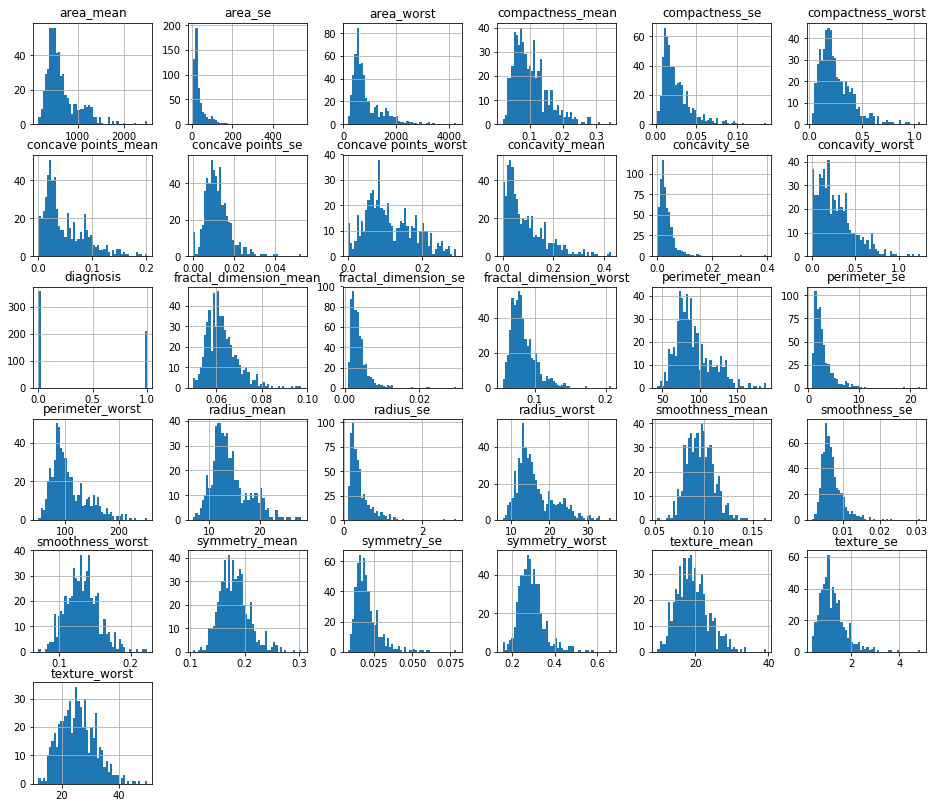

In [8]:
df.hist(bins=50, figsize=(16,14))
plt.show()

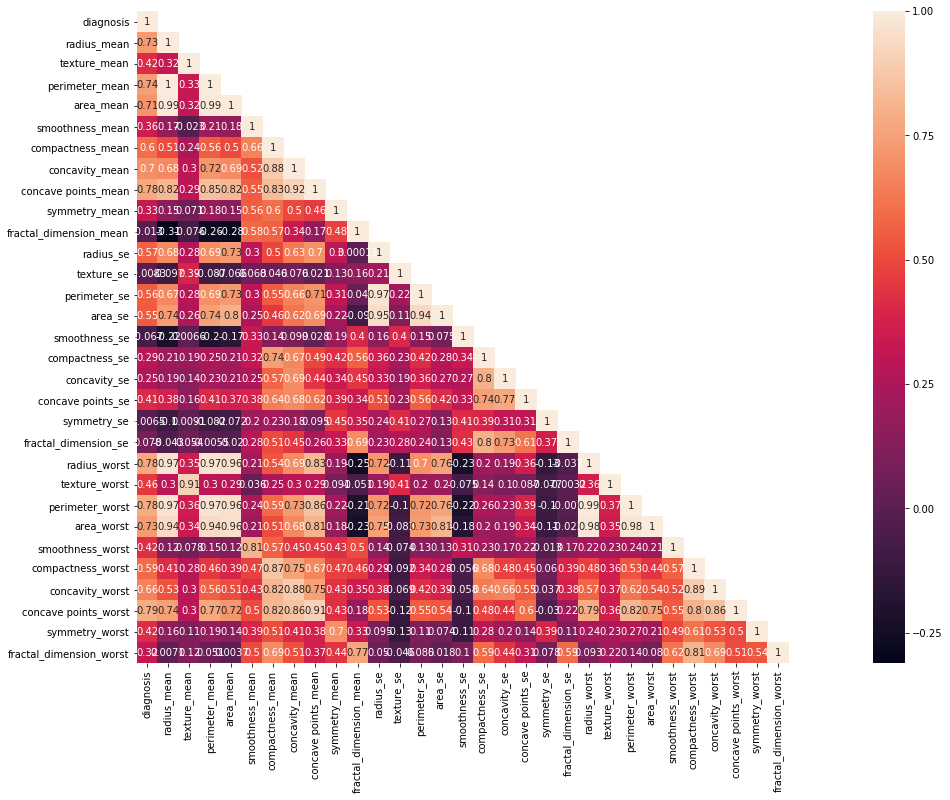

In [9]:
#Correlation Matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [10]:
#Correlation Matrix
cor_mat

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

### Generalize Linear Model 

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_tran = scaler.fit_transform(df)
df_tran = pd.DataFrame(df_tran, columns=cols)
df_tran.head()

C:\Users\rhasan\AppData\Local\Continuum\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rhasan\AppData\Local\Continuum\Anaconda3\envs\py36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [14]:
#show most importance features w.r.t. significance of a glm
import statsmodels.api as sm
glm = sm.GLS(df_tran["diagnosis"], sm.add_constant(df_tran.drop(["diagnosis"], axis=1)))
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.774
Model:                            GLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Tue, 23 Apr 2019   Prob (F-statistic):          6.05e-153
Time:                        08:56:08   Log-Likelihood:                -383.85
No. Observations:                 569   AIC:                             829.7
Df Residuals:                     538   BIC:                             964.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.975e-16      0.020   1.45e-14      1.000      -0.040       0.040
radius_mean                -1.5859      1.264     -1.255      0.210      -4.068       0.896
texture_mean                0.0404      0.071      0.572      0.567      -0.098       0.179
perimeter_mean              1.1921      1.260      0.946      0.345      -1.284       3.668
area_mean                   0.2311      0.382      0.605      0.545      -0.519       0.982
smoothness_mean             0.0025      0.059      0.042      0.967      -0.113       0.118
compactness_mean           -0.4608      0.146     -3.166      0.002      -0.747      -0.175
concavity_mean              0.2303      0.172      1.337      0.182      -0.108       0.569
concave points_mean         0.1717      0.159      1.082      0.280      -0.140       0.483
symmetry_mean               0.0058      0.042      0.138      0.890      -0.077       0.088
fractal_dimension_mean      0.0005      0.081      0.006      0.995      -0.159       0.160
radius_se                   0.2493      0.178      1.401      0.162      -0.100       0.599
texture_se                 -0.0077      0.042     -0.183      0.855      -0.090       0.075
perimeter_se               -0.0941      0.172     -0.548      0.584      -0.432       0.243
area_se                    -0.0868      0.131     -0.660      0.509      -0.345       0.171
smoothness_se               0.0984      0.041      2.393      0.017       0.018       0.179
compactness_se              0.0024      0.080      0.030      0.976      -0.155       0.160
concavity_se               -0.2224      0.081     -2.741      0.006      -0.382      -0.063
concave points_se           0.1347      0.070      1.938      0.053      -0.002       0.271
symmetry_se                 0.0290      0.047      0.622      0.534      -0.063       0.121
fractal_dimension_se       -0.0391      0.064     -0.612      0.541      -0.164       0.086
radius_worst                1.9494      0.579      3.367      0.001       0.812       3.087
texture_worst               0.0909      0.088      1.030      0.303      -0.082       0.264
perimeter_worst            -0.1691      0.412     -0.410      0.682      -0.979       0.641
area_worst                 -1.1898      0.376     -3.163      0.002      -1.929      -0.451
smoothness_worst            0.0256      0.068      0.378      0.705      -0.107       0.159
compactness_worst           0.0218      0.125      0.175      0.861      -0.223       0.267
concavity_worst             0.1643      0.116      1.419      0.156      -0.063       0.392
concave points_worst        0.0631      0.124      0.508      0.612      -0.181       0.307
symmetry_worst              0.0712      0.063      1.126      0.260      -0.053       0.195
fractal_dimension_worst     0.1606      0.089  

### Keeping Statistically Significant Columns for First Model

In [15]:
df_reduced = df[['diagnosis', 'compactness_mean', 'smoothness_se', 'concavity_se', 
                 'concave points_se', 'radius_worst', 'area_worst', 'fractal_dimension_worst']]

In [16]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
diagnosis                  569 non-null int32
compactness_mean           569 non-null float64
smoothness_se              569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
radius_worst               569 non-null float64
area_worst                 569 non-null float64
fractal_dimension_worst    569 non-null float64
dtypes: float64(7), int32(1)
memory usage: 33.4 KB


### Split data set into train and test

In [17]:
label = df_reduced['diagnosis']
features = df_reduced[['compactness_mean', 'smoothness_se', 'concavity_se', 
                 'concave points_se', 'radius_worst', 'area_worst', 'fractal_dimension_worst']]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=101)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 7)
(171, 7)
(398,)
(171,)


### Preprocessing Reduced data set

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#training data set
X_train_prepared = scaler.fit_transform(X_train)
X_train_prepared

array([[-1.59628412, -1.22583434, -0.92600125, ..., -0.43513446,
        -0.44617596, -1.43016122],
       [ 1.50768183,  1.04123323,  0.62817481, ...,  0.0620547 ,
        -0.10643083,  0.38685223],
       [ 0.61743218, -1.14252186, -0.19347224, ...,  0.34702897,
         0.19245673,  1.32208767],
       ...,
       [-0.37034799,  1.33299978,  0.08830473, ...,  0.73103686,
         0.59509878, -1.13641521],
       [ 0.68736687,  0.20188586,  0.21401126, ...,  1.69509876,
         1.69706651,  0.7443152 ],
       [ 0.05984483, -0.07778137, -0.34104077, ..., -0.21079301,
        -0.28834027,  0.29127678]])

In [22]:
#testing data set
X_test_prepared = scaler.transform(X_test)
X_test_prepared

array([[-0.67446937, -1.21235224, -0.62008499, ..., -0.57863214,
        -0.55586413, -0.70551574],
       [-0.84836102,  0.3498433 , -0.4861802 , ..., -0.09963283,
        -0.20679466, -0.679057  ],
       [-0.94834872, -0.57592781, -0.26968562, ..., -0.45938759,
        -0.4600777 , -0.83294967],
       ...,
       [-0.53705716, -0.44318094, -0.71645999, ..., -0.96466112,
        -0.80948624, -0.41554955],
       [-0.00441948,  1.00873791,  0.4013565 , ...,  0.05599142,
        -0.06964206, -0.89828656],
       [-0.84476978, -0.47291071, -0.58820289, ..., -0.56448448,
        -0.53975845, -0.85130879]])

### Data Modelling 

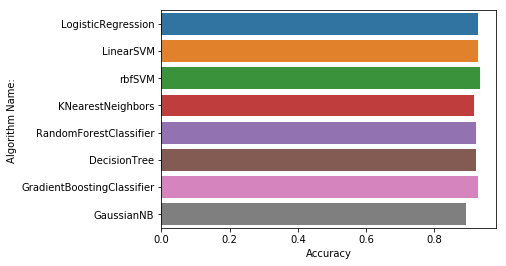

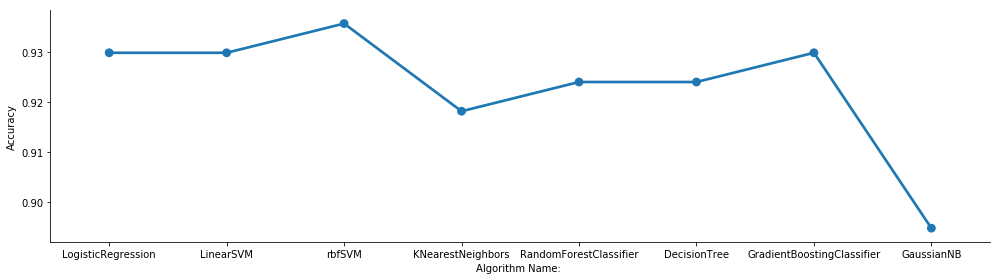

In [23]:
# Ignore warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


#Models
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),
        RandomForestClassifier(),DecisionTreeClassifier(),
        GradientBoostingClassifier(),GaussianNB()]

model_names = ['LogisticRegression','LinearSVM','rbfSVM',
               'KNearestNeighbors','RandomForestClassifier',
               'DecisionTree', 'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train_prepared,y_train)
    pred=clf.predict(X_test_prepared)
    acc.append(accuracy_score(pred,y_test))
     
d={'Algorithm Name: ':model_names,'Accuracy':acc}
d


#Print Accuracy in a data frame
acc_frame=pd.DataFrame(d)
acc_frame

#Plot accuracy by models
sns.barplot(y='Algorithm Name: ',x='Accuracy',data=acc_frame)
#Plot accuracy by models
sns.factorplot(x='Algorithm Name: ', y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)

In [24]:
#Print Accuracy in a data frame
acc_frame=pd.DataFrame(d)
acc_frame

,Algorithm Name:,Accuracy
0,LogisticRegression,0.929825
1,LinearSVM,0.929825
2,rbfSVM,0.935673
3,KNearestNeighbors,0.918129
4,RandomForestClassifier,0.923977
5,DecisionTree,0.923977
6,GradientBoostingClassifier,0.929825
7,GaussianNB,0.894737


In [25]:
#Parameter Tunning Using GridSearchCV
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),
                    param_grid=params_dict,
                    scoring='accuracy',cv=10)
clf_lr.fit(X_train_prepared,y_train)

#Best Parameters
clf_lr.best_params_

{'C': 1, 'penalty': 'l2'}

In [26]:
#Best accuracy obtained by Grid Search
clf_lr.best_score_ 

0.949748743718593

### Evaluation

In [27]:
#Best Accuracy on test set
pred=clf_lr.predict(X_test_prepared)
accuracy_score(pred,y_test)

0.9298245614035088

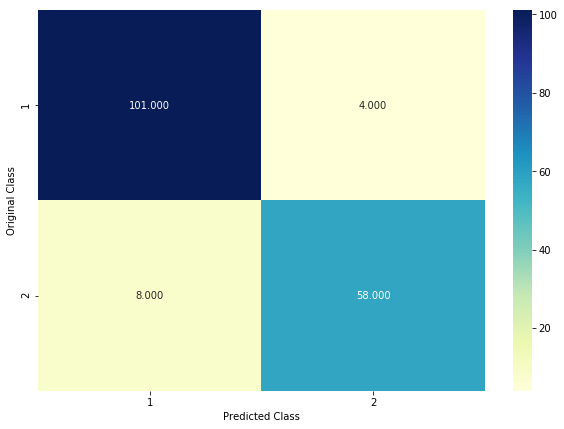

In [28]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test, pred)


#put it in a graph
import seaborn as sns
labels = [1,2] #no. of class predicting
plt.figure(figsize=(10,7))
sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels) #C is confusion matrix
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

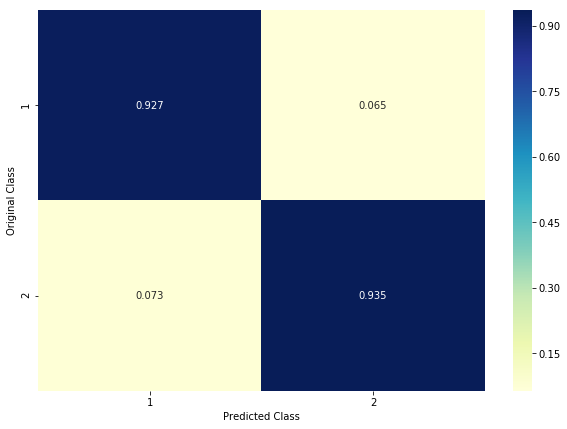

In [29]:
#Precision Matrix 
Precision = (C/C.sum(axis=0)) #C = Confusion Matrix

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(Precision, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

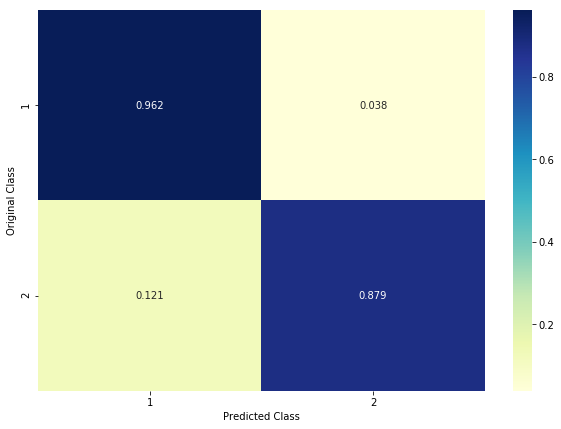

In [30]:
#Recall Matrix
Recall = (((C.T)/(C.sum(axis=1))).T) #C = Confusion Matrix

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(Recall, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

### Modeling in Full Data Set

In [31]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [32]:
df_label = df['diagnosis']
df_features = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

#Spliting and preprocessing data
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(df_features, df_label, test_size=0.3, random_state=101)
X_train_prepared_f = scaler.fit_transform(X_train_f)
X_train_prepared_f

array([[-0.28192196,  0.66174195, -0.37431608, ..., -1.57163052,
        -0.987646  , -1.43016122],
       [ 0.18650131, -1.22186345,  0.28233605, ..., -0.05396602,
        -0.13691022,  0.38685223],
       [ 0.19207778,  0.51772843,  0.17417681, ...,  1.03113696,
         1.25592976,  1.32208767],
       ...,
       [ 0.57127757,  0.07425823,  0.52052941, ...,  0.56182245,
        -0.41995577, -1.13641521],
       [ 1.32410067,  0.48115357,  1.28210004, ...,  1.35098825,
         1.22554634,  0.7443152 ],
       [-0.08674559, -0.14747687, -0.10209509, ...,  0.20908924,
        -0.10172941,  0.29127678]])

In [33]:
#Prepare test data
X_test_prepared_f = scaler.transform(X_test_f)
X_test_prepared_f

array([[-0.46315715, -0.17947988, -0.4958433 , ..., -0.44825   ,
         0.11255366, -0.70551574],
       [ 0.00526612, -0.76467767, -0.05956056, ..., -0.59606913,
        -0.30002121, -0.679057  ],
       [-0.30980429, -0.68467016, -0.35325136, ..., -0.47918889,
         0.17811788, -0.83294967],
       ...,
       [-1.04868623, -1.62418693, -1.03299365, ..., -0.70921279,
         0.0389938 , -0.41554955],
       [ 0.3761012 ,  0.78518211,  0.36254402, ...,  0.49605863,
        -0.57027375, -0.89828656],
       [-0.63045117, -0.27091703, -0.6582847 , ..., -0.63986185,
        -1.49456939, -0.85130879]])

In [34]:
print(X_train_prepared_f.shape)
print(X_test_prepared_f.shape)
print(y_train_f.shape)
print(y_test_f.shape)

(398, 30)
(171, 30)
(398,)
(171,)


### Modeling Full Data Set

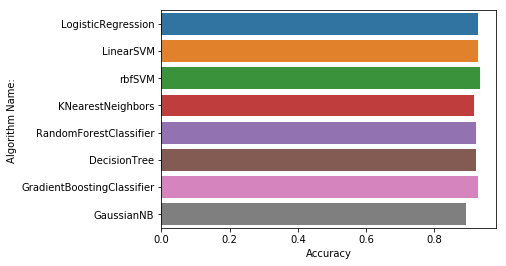

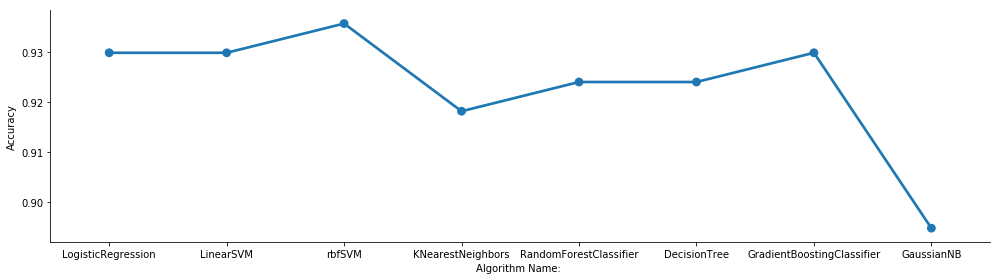

In [35]:
# Ignore warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


#Models
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),
        RandomForestClassifier(),DecisionTreeClassifier(),
        GradientBoostingClassifier(),GaussianNB()]

model_names = ['LogisticRegression','LinearSVM','rbfSVM',
               'KNearestNeighbors','RandomForestClassifier',
               'DecisionTree', 'GradientBoostingClassifier','GaussianNB']

acc_f=[]
d_f={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train_prepared_f,y_train_f)
    pred_f=clf.predict(X_test_prepared_f)
    acc.append(accuracy_score(pred_f,y_test))
     
d_f={'Algorithm Name: ':model_names,'Accuracy':acc_f}
d_f

#Plot accuracy by models
sns.barplot(y='Algorithm Name: ',x='Accuracy',data=acc_frame)
#Plot accuracy by models
sns.factorplot(x='Algorithm Name: ', y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)

In [36]:
#Parameter Tunning Using GridSearchCV
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),
                    param_grid=params_dict,
                    scoring='accuracy',cv=10)
clf_lr.fit(X_train_prepared_f,y_train_f)

#Best Parameters
clf_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [37]:
#Best accuracy obtained by Grid Search
clf_lr.best_score_ 

0.9798994974874372

### Evaluation 

In [38]:
#Best Accuracy on test set
pred_f=clf_lr.predict(X_test_prepared_f)
accuracy_score(pred_f,y_test_f)

0.9824561403508771

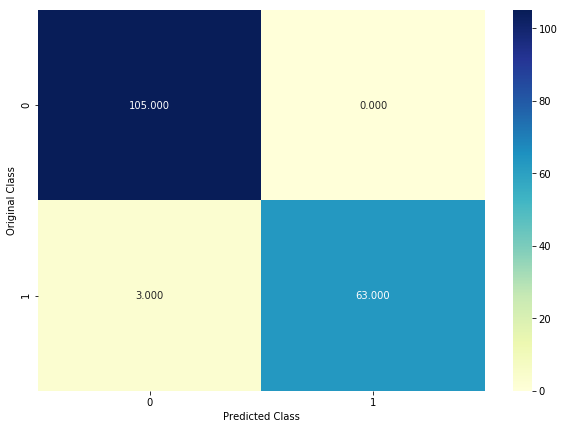

In [39]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test_f, pred_f)


#put it in a graph
import seaborn as sns
labels = [0,1] #no. of class predicting
plt.figure(figsize=(10,7))
sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels) #C is confusion matrix
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

    ### 04/22/2019 Work Continues

In [40]:
print(X_train_prepared_f.shape)
print(X_test_prepared_f.shape)
print(y_train_f.shape)
print(y_test_f.shape)

(398, 30)
(171, 30)
(398,)
(171,)


## Training Test Accuracy 

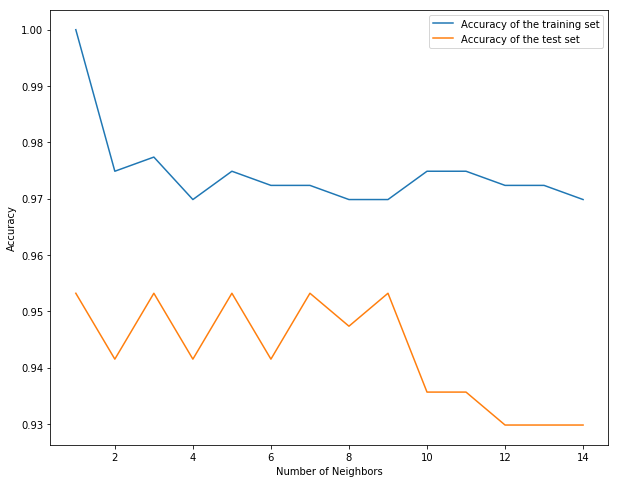

In [41]:
training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_prepared_f,y_train_f)
    training_accuracy.append(knn.score(X_train_prepared_f, y_train_f))
    test_accuracy.append(knn.score(X_test_prepared_f, y_test_f))
 
plt.figure(figsize=(10,8))
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

#by looking at plot, best result accurs when n_neighbors is 6

In [42]:
#Best accuracy around KNN 5
print("Accuracy of the training set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_accuracy[5]))

Accuracy of the training set for 6NN: 0.972362
Accuracy of the test set for 6NN: 0.941520


### Logistic Regression 

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train_prepared_f, y_train_f)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train_prepared_f,y_train_f)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test_prepared_f,y_test_f)))

#It seems as it does better than KNN

Accuracy on the training set: 0.985
Accuracy on the training set: 0.977


### Training Testing Accuracy for Decision Tree

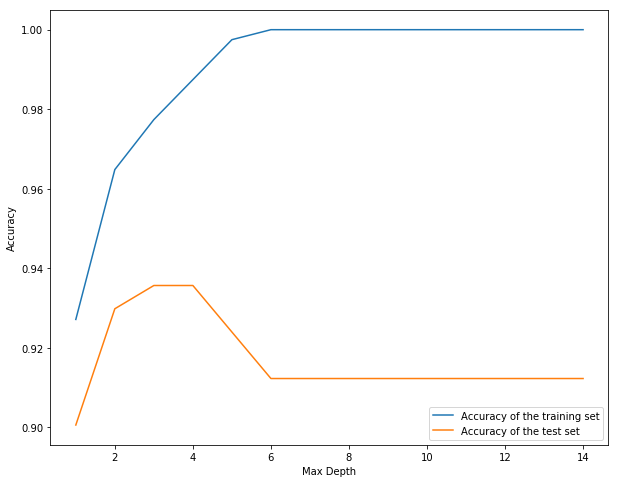

In [44]:
training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train_prepared_f,y_train_f)
    training_accuracy.append(tree.score(X_train_prepared_f, y_train_f))
    test_accuracy.append(tree.score(X_test_prepared_f, y_test_f))
 
plt.figure(figsize=(10,8))
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# By having larger max_depth (>5), we overfit the model into training data, so the accuracy for training set become 
# but the accuracy for test set decrease

# other parameters than can work with:
# - min_samples_leaf, max_sample_leaf
# - max_leaf_node

# by looking at plot, best result accurs when max_depth is 3

In [45]:
#Best accuracy for Max depth 3
print("Accuracy of the training set for Max Depth 3: {:3f}".format(training_accuracy[3]))
print("Accuracy of the test set for Max Depth 3: {:3f}".format(test_accuracy[3]))

Accuracy of the training set for Max Depth 3: 0.987437
Accuracy of the test set for Max Depth 3: 0.935673


In [46]:
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [0.         0.00901464 0.         0.         0.01622635 0.
 0.00261785 0.         0.         0.         0.         0.
 0.01342513 0.         0.00166309 0.         0.         0.00721171
 0.         0.02054614 0.04212474 0.01888245 0.01307519 0.10700049
 0.01875045 0.         0.         0.70914877 0.         0.02031299]


numpy.ndarray

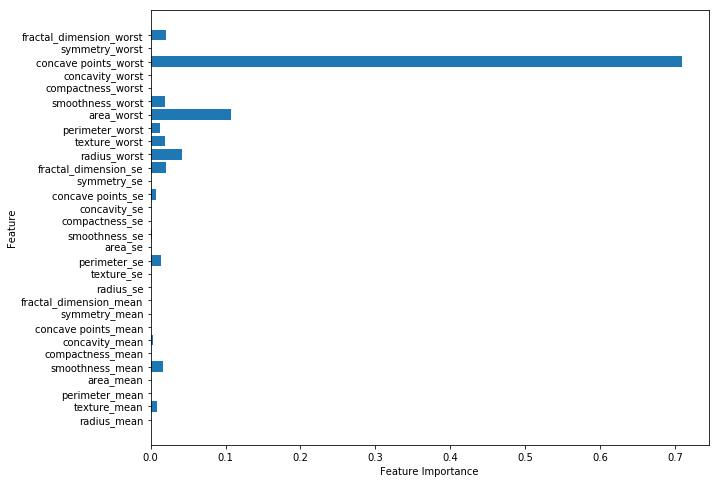

In [47]:
#Feature Importance
n_feature = df_features.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), df_features.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Random Forest

In [48]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train_prepared_f,y_train_f)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature


print('acc for training data: {:.3f}'.format(forest.score(X_train_prepared_f,y_train_f)))
print('acc for test data: {:.3f}'.format(forest.score(X_test_prepared_f,y_test_f)))

acc for training data: 1.000
acc for test data: 0.953


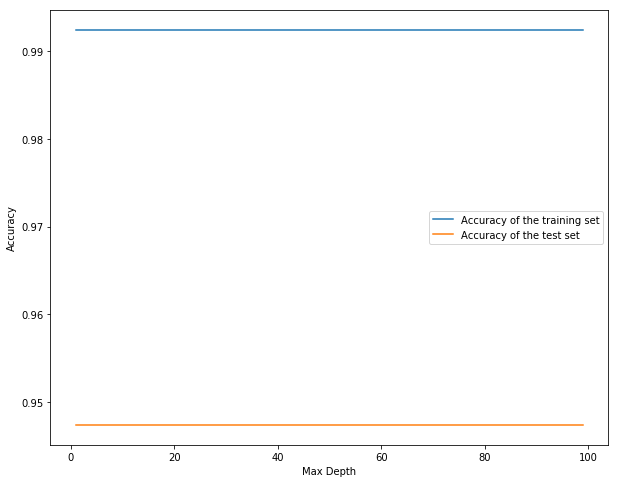

In [49]:
training_accuracy = []
test_accuracy = []

n_estimators = range(1,100)

for estimators in n_estimators:
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X_train_prepared_f,y_train_f)
    training_accuracy.append(forest.score(X_train_prepared_f, y_train_f))
    test_accuracy.append(forest.score(X_test_prepared_f, y_test_f))
 
plt.figure(figsize=(10,8))
plt.plot(n_estimators,training_accuracy, label='Accuracy of the training set')
plt.plot(n_estimators,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# By having larger max_depth (>5), we overfit the model into training data, so the accuracy for training set become 
# but the accuracy for test set decrease

# other parameters than can work with:
# - min_samples_leaf, max_sample_leaf
# - max_leaf_node

# by looking at plot, best result accurs when max_depth is 3

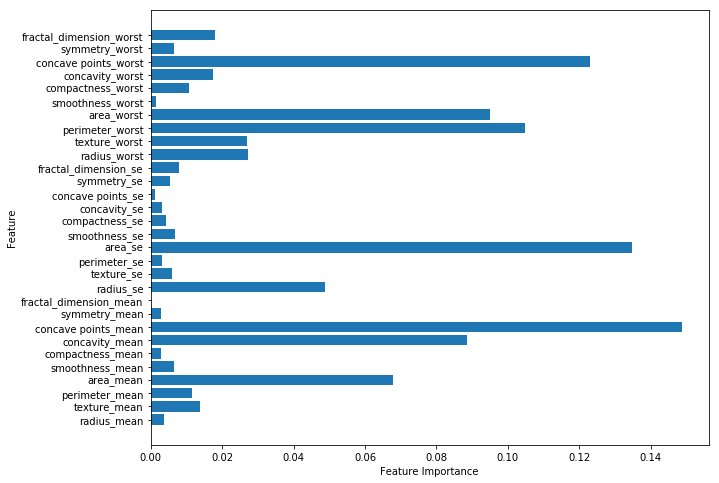

In [50]:
#Feature Importance
n_feature = df_features.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_feature), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), df_features.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Neural network Scikit

In [51]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_prepared_f, y_train_f)

print('acc for training data: {:.3f}'.format(mlp.score(X_train_prepared_f, y_train_f)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_prepared_f, y_test_f)))

acc for training data: 0.992
acc for test data: 0.965


In [52]:
print('The max per each feature:\n{}'.format(df_features.max(axis=0)))

The max per each feature:
radius_mean                  28.11000
texture_mean                 39.28000
perimeter_mean              188.50000
area_mean                  2501.00000
smoothness_mean               0.16340
compactness_mean              0.34540
concavity_mean                0.42680
concave points_mean           0.20120
symmetry_mean                 0.30400
fractal_dimension_mean        0.09744
radius_se                     2.87300
texture_se                    4.88500
perimeter_se                 21.98000
area_se                     542.20000
smoothness_se                 0.03113
compactness_se                0.13540
concavity_se                  0.39600
concave points_se             0.05279
symmetry_se                   0.07895
fractal_dimension_se          0.02984
radius_worst                 36.04000
texture_worst                49.54000
perimeter_worst             251.20000
area_worst                 4254.00000
smoothness_worst              0.22260
compactness_worst       

In [53]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

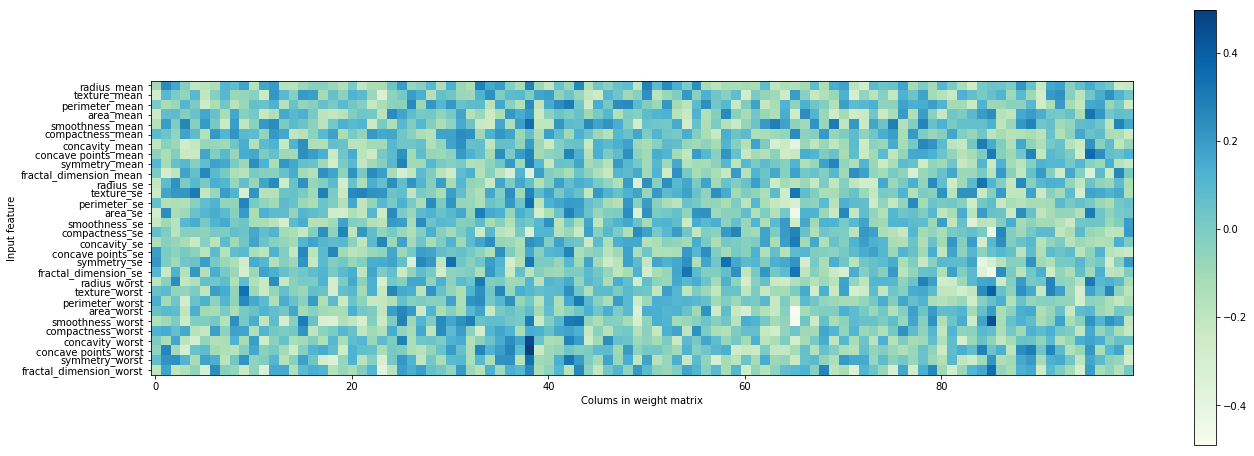

In [54]:
plt.figure(figsize=(22,8))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30),df_features.columns)
plt.xlabel('Colums in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

In [55]:
svm= SVC()
svm.fit(X_train_prepared_f, y_train_f)

print('acc on train dataset: {:.3f}'.format(svm.score(X_train_prepared_f,y_train_f)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_prepared_f,y_test_f)))

acc on train dataset: 0.982
acc on test dataset: 0.982


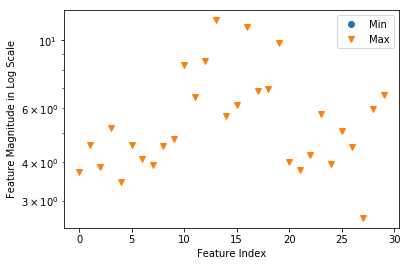

In [56]:
plt.plot(X_train_prepared_f.min(axis=0), 'o', label='Min')
plt.plot(X_train_prepared_f.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

### Tensorflow Classification Implementation

In [76]:
#Importing packages
import tensorflow as tf
import pandas as pd

#Importing data set
df = pd.read_csv('C:\\Users\\rhasan\\Downloads\\Data Science Folder\\Daily Work\\04-18-2019\\Cancer Classification\\data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
df = df.drop('id', axis=1)

In [78]:
def label_fix(label):
    if label=='B':
        return 0
    else:
        return 1

In [79]:
df['diagnosis'] = df['diagnosis'].apply(label_fix)

In [80]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [81]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [82]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int32
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

### Working with a smaller column numbers

In [83]:
df_reduced = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',  
                 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']]

In [84]:
df_reduced.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean'],
      dtype='object')

In [85]:
df_reduced.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980


### Normalizing all columns

In [86]:
cols_to_norm = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',  
                'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']

In [87]:
df_reduced[cols_to_norm] = df_reduced[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [88]:
df_reduced.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918
5,1.0,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728
6,1.0,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058
7,1.0,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447
8,1.0,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567
9,1.0,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568


### Spliting Data Set into Train and Test

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_data = df_tensor.drop('diagnosis',axis=1)
y_labels = df_tensor['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3,random_state=101)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


### Tensorflow feature columns

In [92]:
radius_mean = tf.feature_column.numeric_column('radius_mean')
texture_mean = tf.feature_column.numeric_column('texture_mean')
perimeter_mean = tf.feature_column.numeric_column('perimeter_mean')
area_mean = tf.feature_column.numeric_column('area_mean')
smoothness_mean = tf.feature_column.numeric_column('smoothness_mean')
compactness_mean = tf.feature_column.numeric_column('compactness_mean')
concavity_mean = tf.feature_column.numeric_column('concavity_mean')

radius_mean = tf.feature_column.numeric_column('radius_mean')
texture_mean = tf.feature_column.numeric_column('texture_mean')
perimeter_mean = tf.feature_column.numeric_column('perimeter_mean')
area_mean = tf.feature_column.numeric_column('area_mean')
smoothness_mean = tf.feature_column.numeric_column('smoothness_mean')
compactness_mean = tf.feature_column.numeric_column('compactness_mean')
concavity_mean = tf.feature_column.numeric_column('concavity_mean')
concave_points_mean = tf.feature_column.numeric_column('concave points_mean')
symmetry_mean = tf.feature_column.numeric_column('symmetry_mean')
fractal_dimension_mean = tf.feature_column.numeric_column('fractal_dimension_mean')
radius_se = tf.feature_column.numeric_column('radius_se')
texture_se = tf.feature_column.numeric_column('texture_se')
perimeter_se = tf.feature_column.numeric_column('perimeter_se')
area_se = tf.feature_column.numeric_column('area_se')
smoothness_se = tf.feature_column.numeric_column('smoothness_se')
compactness_se = tf.feature_column.numeric_column('compactness_se')
concavity_se = tf.feature_column.numeric_column('concavity_se')
concave_points_se = tf.feature_column.numeric_column('concave points_se')
symmetry_se = tf.feature_column.numeric_column('symmetry_se')
fractal_dimension_se = tf.feature_column.numeric_column('fractal_dimension_se')
radius_worst = tf.feature_column.numeric_column('radius_worst')
texture_worst = tf.feature_column.numeric_column('texture_worst')
perimeter_worst = tf.feature_column.numeric_column('perimeter_worst')
area_worst = tf.feature_column.numeric_column('area_worst')
smoothness_worst = tf.feature_column.numeric_column('smoothness_worst')
compactness_worst = tf.feature_column.numeric_column('compactness_worst')
concavity_worst = tf.feature_column.numeric_column('concavity_worst')
concave_points_worst = tf.feature_column.numeric_column('concave points_worst')
symmetry_worst = tf.feature_column.numeric_column('symmetry_worst')
fractal_dimension_worst = tf.feature_column.numeric_column('fractal_dimension_worst')

feat_cols = [radius_mean, texture_mean, perimeter_mean, area_mean, 
             smoothness_mean, compactness_mean, concavity_mean, concave_points_mean, 
             symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, 
             area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, 
             symmetry_se,fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, 
             area_worst, smoothness_worst, compactness_worst, concavity_worst, concave_points_worst,
             symmetry_worst, fractal_dimension_worst]

In [93]:
feat_cols = [radius_mean, texture_mean, perimeter_mean, area_mean, 
             smoothness_mean, compactness_mean, concavity_mean]

### Input Functions

In [94]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,
                                               y=y_train,batch_size=100,num_epochs=10,shuffle=True)

### TF Model

In [96]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\rhasan\\AppData\\Local\\Temp\\tmpstivtx11', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000001B64A240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train Model

In [98]:
model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\rhasan\AppData\Local\Temp\tmpstivtx11\model.ckpt-40
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 40 into C:\Users\rhasan\AppData\Local\Temp\tmpstivtx11\model.ckpt.
INFO:tensorflow:loss = 78.49375, step = 41
INFO:tensorflow:Saving checkpoints for 80 into C:\Users\rhasan\AppData\Local\Temp\tmpstivtx11\model.ckpt.
INFO:tensorflow:Loss for final step: 82.992355.


In [99]:
print(tf.__version__)

1.13.1


### Prediction

In [100]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [101]:
predictions = list(model.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\rhasan\AppData\Local\Temp\tmpstivtx11\model.ckpt-80
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [102]:
predictions[0]

{'logits': array([-9.354226], dtype=float32),
 'logistic': array([8.666515e-05], dtype=float32),
 'probabilities': array([9.9991345e-01, 8.6591172e-05], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object)}

### All Predictions in a Dictionary

In [103]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [104]:
final_preds[:10]

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]

### Evaluation

In [105]:
from sklearn.metrics import classification_report

In [106]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       105
           1       0.92      0.70      0.79        66

   micro avg       0.86      0.86      0.86       171
   macro avg       0.88      0.83      0.84       171
weighted avg       0.87      0.86      0.85       171

